### 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)

In [3]:
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

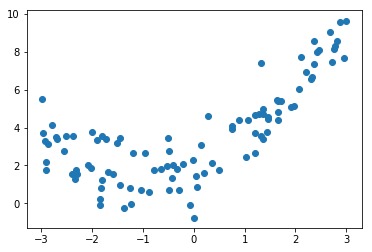

In [4]:
plt.scatter(x, y)

### 使用线性回归拟合

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
reg1 = LinearRegression()

In [8]:
reg1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
y_predict = reg1.predict(X)

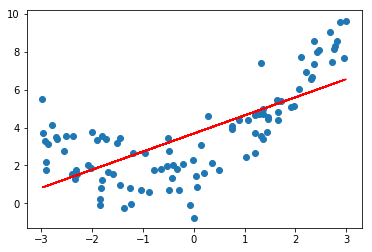

In [12]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')

In [16]:
reg1.score(X, y)

0.4953707811865009

#### 使用线性回归拟合的评分结果

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
# 使用均方误差评价结果
mean_squared_error(y, y_predict)

3.0750025765636577

### 使用多项式回归

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly = PolynomialFeatures(degree=2)

In [26]:
poly.fit(X, y)

In [29]:
X2 = poly.transform(X)

In [32]:
reg2 = LinearRegression()

In [34]:
reg2.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
y2_predict = reg2.predict(X2)

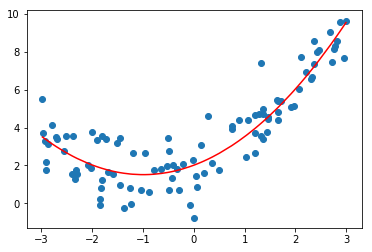

In [37]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')

In [39]:
reg2.score(X2, y)

0.8196892855998191

In [42]:
mean_squared_error(y, y2_predict)

1.0987392142417856

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
def poly_regression(degree):
    return Pipeline(
        [
            ("poly", PolynomialFeatures(degree=degree)),
            ("std_scaler", StandardScaler() ),
            ("lin_reg",  LinearRegression())
    ])

In [47]:
reg10 = poly_regression(10)

In [48]:
reg10.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [52]:
y_predict = reg10.predict(X)

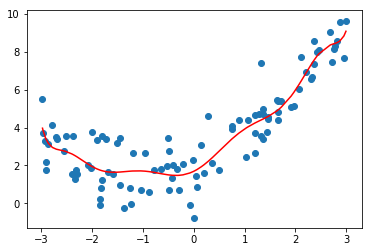

In [54]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

In [55]:
reg10.score(X, y)

0.8275487827443732

In [56]:
mean_squared_error(y, y_predict)

1.050846676376414

In [ ]:
# 维度越高 拟合结果的score越高， 均方误差越低 出现过拟合的情况
# 用线性曲线拟合二次曲线，出现的是欠拟合现象

### 模型泛化能力

#### train_test_split的意义

In [58]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [62]:
lin_reg = LinearRegression()

In [63]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
y_predict = lin_reg.predict(X_test)

In [66]:
mean_squared_error(y_test, y_predict)

2.660400302710088

In [72]:
poly2_reg = poly_regression(2)

In [73]:
poly2_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [75]:
y2_predict = poly2_reg.predict(X_test)

In [76]:
mean_squared_error(y_test, y2_predict)

0.8070018914333519

In [77]:
poly10_reg = poly_regression(10)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)

In [78]:
mean_squared_error(y_test, y10_predict)

1.015869395647139